In [198]:
import tensorflow as tf
import keras
from keras import layers

tf.random.set_seed(22)

In [199]:
import json
import numpy as np
import pandas as pd
from time import time
import random
import matplotlib.pyplot as plt
import os

In [200]:
name_model = "RWMDMAP-MP50-NB"
with open("../examples/rez.json", "r") as f:
    dataset = json.load(f)

In [201]:
print("Первый x:\n", dataset["train_x"][0])
print("Последний, x:\n", dataset["train_x"][-1])
print("Размер x:\t", len(dataset["train_x"][0]))
print("Первый y:\t", dataset["train_y"][0])
print("Последний y:\t", dataset["train_y"][0])
print("Кол-во записей:\t", len(dataset["train_x"]))

Первый x:
 [0.8494507187619246, 0.08893037500931283, 0.8494507187619246, 0.26666666666666666, 0.0, 1.0, 0.0, 0.9989200860780658, 0.38509316770186336, 1.0, 1.0, 0.11857383334575045, 1.0, 0.2, 0.0, 0.9989200860780658, 0.0, 1.0, 0.09937888198757765, 1.0, 1.0, 0.11857383334575045, 1.0, 0.2, 0.0, 0.9989200860780658, 0.0, 1.0, 0.09937888198757765, 1.0, 1.0, 0.11857383334575045, 1.0, 0.2, 0.0, 0.9989200860780658, 0.0, 1.0, 0.09937888198757765, 1.0, 0.3474307909590596, 0.08893037500931283, 0.3474307909590596, 1.0, 0.0, 1.0, 0.0, 0.0, 0.006211180124223603, 1.0, 1.0, 0.11857383334575045, 1.0, 0.2, 0.0, 0.9989200860780658, 0.0, 1.0, 0.09937888198757765, 1.0, 0.3474307909590596, 0.08893037500931283, 0.3474307909590596, 1.0, 0.0, 1.0, 0.0, 0.0, 0.006211180124223603, 1.0, 0.3474307909590596, 0.08893037500931283, 0.3474307909590596, 1.0, 0.0, 1.0, 0.0, 0.0, 0.006211180124223603, 1.0, 0.3474307909590596, 0.08893037500931283, 0.3474307909590596, 1.0, 0.0, 1.0, 0.0, 0.0, 0.006211180124223603, 1.0, 0.347

In [202]:
train_x, train_y, val_x, val_y, test_x, test_y, = dataset["train_x"], dataset["train_y"], dataset["val_x"], dataset["val_y"], dataset["test_x"] , dataset["test_y"]

In [332]:
hist = []
model = keras.Sequential()

input_len = 500
output_len = 5

model.add(layers.Dense(units=input_len, activation='relu'))
model.add(layers.Flatten(input_shape=(5, )))
model.add(layers.Flatten(input_shape=(5, )))
# model.add(layers.Dense(units=256,  activation='relu'))

model.add(layers.Dense(units=100,  activation='relu'))
model.add(layers.Dropout(rate=0.25, seed=22))
model.add(layers.Dense(units=50,  activation='relu'))
model.add(layers.Dropout(rate=0.25, seed=22))
model.add(layers.Dense(units=25,  activation='relu'))
model.add(layers.Dropout(rate=0.25, seed=22))
model.add(layers.Dense(units=output_len, activation='softmax'))

In [333]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [334]:
batch_size = 50
history = model.fit(train_x, train_y, epochs=50, batch_size=batch_size, validation_data=(val_x, val_y))
hist.append(history)

Epoch 1/50
63/63 [==============================] - 2s 23ms/step - loss: 1.4579 - accuracy: 0.3437 - val_loss: 1.3347 - val_accuracy: 0.3758
Epoch 2/50
63/63 [==============================] - 0s 5ms/step - loss: 1.3701 - accuracy: 0.3841 - val_loss: 1.3001 - val_accuracy: 0.4038
Epoch 3/50
63/63 [==============================] - 0s 6ms/step - loss: 1.3224 - accuracy: 0.4235 - val_loss: 1.2859 - val_accuracy: 0.4662
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 1.3017 - accuracy: 0.4423 - val_loss: 1.2635 - val_accuracy: 0.4662
Epoch 5/50
63/63 [==============================] - 0s 5ms/step - loss: 1.2482 - accuracy: 0.4839 - val_loss: 1.2075 - val_accuracy: 0.5096
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 1.2044 - accuracy: 0.4992 - val_loss: 1.2002 - val_accuracy: 0.4994
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 1.1586 - accuracy: 0.5170 - val_loss: 1.1928 - val_accuracy: 0.4968
Epoch 8/50
63/63 [=

In [338]:
loss_and_metrics = model.evaluate(test_x, test_y, batch_size=batch_size)
loss_and_metrics

20/20 [==============================] - 0s 2ms/step - loss: 2.2723 - accuracy: 0.5214


[2.272346258163452, 0.5214285850524902]

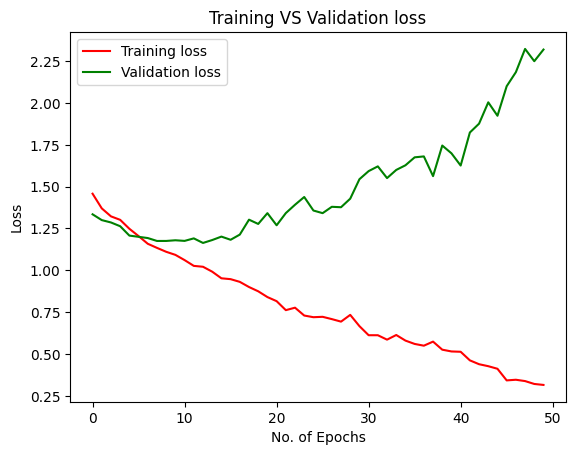

In [339]:
plt.plot(np.concatenate([h.history['loss'] for h in hist]), 'r', label='Training loss')
plt.plot(np.concatenate([h.history['val_loss'] for h in hist]), 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

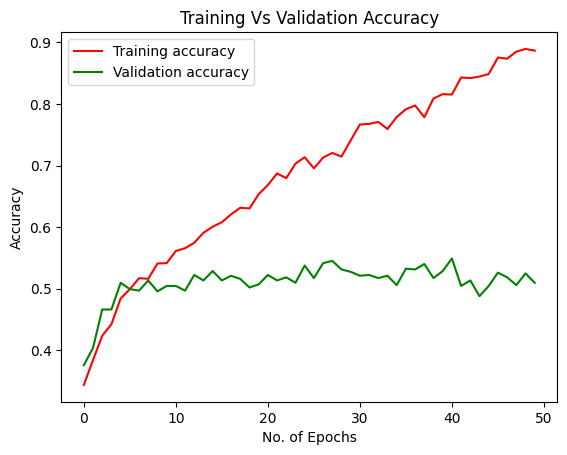

In [340]:
plt.plot(np.concatenate([h.history['accuracy'] for h in hist]), 'r', label='Training accuracy')
plt.plot(np.concatenate([h.history['val_accuracy'] for h in hist]), 'g', label='Validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [223]:
class ExportModule(tf.Module):
  def __init__(self, model, preprocess, class_pred):
    # Initialize pre and postprocessing functions
    self.model = model
    self.preprocess = preprocess
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, input_len], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = self.preprocess(x)
    y = self.model(x)
    print(y)
    y = self.class_pred(y)
    return y

In [172]:
def preprocess_test(x):
  return x

def class_pred_test(y):
  # Generate class predictions from MLP output
  return y

In [173]:
mlp_model_export = ExportModule(model=model,
                                preprocess=preprocess_test,
                                class_pred=class_pred_test)

In [174]:
save_path = name_model
tf.saved_model.save(mlp_model_export, save_path)
mlp_loaded = tf.saved_model.load(save_path)

Tensor("sequential_15/dense_89/Softmax:0", shape=(None, 5), dtype=float32)
INFO:tensorflow:Assets written to: RWMDMA-MP50-NB/assets


INFO:tensorflow:Assets written to: RWMDMA-MP50-NB/assets


In [175]:
def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

test_classes = mlp_loaded(test_x)
test_acc = accuracy_score([np.argmax(y) for y in test_classes], [np.argmax(y) for y in test_y])
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.543


In [176]:
mlp_loaded(test_x)

<tf.Tensor: shape=(980, 5), dtype=float32, numpy=
array([[1.4182316e-01, 2.3126879e-01, 1.7448731e-02, 3.2943612e-01,
        2.8002328e-01],
       [5.6660748e-01, 8.2528256e-03, 8.9880131e-04, 2.6245570e-02,
        3.9799526e-01],
       [2.7123106e-01, 3.8442924e-03, 4.3228581e-03, 7.1602361e-04,
        7.1988571e-01],
       ...,
       [9.4004792e-01, 1.1038423e-03, 6.1688149e-10, 2.2356475e-03,
        5.6612559e-02],
       [9.9879727e-03, 1.3220030e-01, 7.4812454e-01, 1.0814756e-01,
        1.5396533e-03],
       [6.9349304e-02, 2.0557930e-01, 5.0573552e-01, 1.8056561e-01,
        3.8770318e-02]], dtype=float32)>